# Clean and display the two datasets: 

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load GDP dataset
df_GDP = pd.read_csv('GDP_CA_2001_2020.csv')
df_GDP['GeoName'] = df_GDP['GeoName'].str.rstrip(', CA')
df_GDP.drop(df_GDP.tail(4).index,inplace=True) # drop last n rows
df_GDP = df_GDP.drop(['GeoFIPS','Region','TableName','LineCode','IndustryClassification'],axis=1)
df_GDP = df_GDP[df_GDP.Description == 'Current-dollar GDP (thousands of current dollars)']
df_GDP = df_GDP.drop(df_GDP.columns[3:14],axis=1)
df_GDP = df_GDP.dropna()
df_GDP

,GeoName,Description,Unit,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,California,Current-dollar GDP (thousands of current dollars),Thousands of dollars,2.113096e+09,2.220390e+09,2.335286e+09,2.473556e+09,2.569634e+09,2.730974e+09,2.895101e+09,3.052645e+09,3.007188e+09
5,Alameda,Current-dollar GDP (thousands of current dollars),Thousands of dollars,9.574948e+07,1.005214e+08,1.059368e+08,1.157918e+08,1.210535e+08,1.290289e+08,1.361689e+08,1.418886e+08,1.393132e+08
8,Alpine,Current-dollar GDP (thousands of current dollars),Thousands of dollars,9.529400e+04,9.392700e+04,1.027050e+05,1.085030e+05,1.092630e+05,1.108430e+05,1.140550e+05,1.219480e+05,1.124150e+05
11,Amador,Current-dollar GDP (thousands of current dollars),Thousands of dollars,1.365613e+06,1.440258e+06,1.488434e+06,1.551133e+06,1.617941e+06,1.732487e+06,1.786296e+06,1.870309e+06,1.848108e+06
14,Butte,Current-dollar GDP (thousands of current dollars),Thousands of dollars,7.363012e+06,7.602095e+06,7.634930e+06,8.041364e+06,8.649007e+06,9.189787e+06,9.500527e+06,9.893227e+06,9.461454e+06
17,Calaveras,Current-dollar GDP (thousands of current dollars),Thousands of dollars,1.050964e+06,1.044218e+06,1.172626e+06,1.246769e+06,1.362303e+06,1.442782e+06,1.415632e+06,1.661687e+06,1.579783e+06
20,Colusa,Current-dollar GDP (thousands of current dollars),Thousands of dollars,1.197262e+06,1.322530e+06,1.128142e+06,1.378865e+06,1.344228e+06,1.272562e+06,1.524227e+06,1.372137e+06,1.629003e+06
23,Contra Costa,Current-dollar GDP (thousands of current dollars),Thousands of dollars,6.220741e+07,6.304071e+07,6.828270e+07,6.888313e+07,6.633854e+07,7.209355e+07,8.092180e+07,8.259453e+07,7.748475e+07
26,Del Norte,Current-dollar GDP (thousands of current dollars),Thousands of dollars,6.943710e+05,7.020370e+05,7.137360e+05,7.376410e+05,7.684460e+05,7.622530e+05,8.037490e+05,8.184160e+05,9.431730e+05
29,El Dorado,Current-dollar GDP (thousands of current dollars),Thousands of dollars,5.984844e+06,6.197638e+06,6.548820e+06,6.919116e+06,7.565475e+06,8.051829e+06,8.501615e+06,8.669087e+06,8.294970e+06


In [90]:
# load EHR dataset
df_EHR = pd.read_csv('EHR_Incentive_Program_Payments_-_Providers.csv')
df_EHR = df_EHR.drop(df_EHR.columns[0:9], axis=1)
df_EHR = df_EHR.drop(df_EHR.columns[1:3], axis=1)
df_EHR = df_EHR.drop(['Payment__1','Payment_Cr','Payee_Name','Payee_NPI','total_rece','Latitude','Longitude','Program_Ye'],axis=1)
df_EHR = df_EHR.dropna()
df_EHR

,Business_1,Payment_Ye,total_paym
0,Sacramento,2019,38250.0
1,Alameda,2014,21250.0
2,Contra Costa,2016,21250.0
3,San Bernardino,2015,29750.0
4,Orange,2014,21250.0
...,...,...,...
25686,Los Angeles,2012,21250.0
25687,Los Angeles,2016,29750.0
25688,San Francisco,2017,21250.0
25689,Los Angeles,2013,21250.0


# Aggregate the datasets

In [91]:
df_GDP = df_GDP.groupby(['GeoName','Description','Unit']).sum().reset_index()
df_GDP.head(5)

,GeoName,Description,Unit,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Alameda,Current-dollar GDP (thousands of current dollars),Thousands of dollars,95749481.0,100521444.0,105936777.0,115791781.0,121053460.0,129028899.0,136168877.0,141888634.0,139313240.0
1,Alpine,Current-dollar GDP (thousands of current dollars),Thousands of dollars,95294.0,93927.0,102705.0,108503.0,109263.0,110843.0,114055.0,121948.0,112415.0
2,Amador,Current-dollar GDP (thousands of current dollars),Thousands of dollars,1365613.0,1440258.0,1488434.0,1551133.0,1617941.0,1732487.0,1786296.0,1870309.0,1848108.0
3,Butte,Current-dollar GDP (thousands of current dollars),Thousands of dollars,7363012.0,7602095.0,7634930.0,8041364.0,8649007.0,9189787.0,9500527.0,9893227.0,9461454.0
4,Calaveras,Current-dollar GDP (thousands of current dollars),Thousands of dollars,1050964.0,1044218.0,1172626.0,1246769.0,1362303.0,1442782.0,1415632.0,1661687.0,1579783.0


In [92]:
df_EHR = df_EHR.groupby(['Business_1','Payment_Ye']).sum().reset_index()
df_EHR.tail()

,Business_1,Payment_Ye,total_paym
454,Yuba,2014,255000.0
455,Yuba,2015,76500.0
456,Yuba,2017,552500.0
457,Yuba,2018,187000.0
458,Yuba,2019,63750.0


# Reshape DataFrame from wide format to long format

In [93]:
year_list = df_GDP.columns[3:]
df_GDP = pd.melt(df_GDP, id_vars=['GeoName','Description','Unit'], value_vars=year_list) #Pandas.melt() unpivots a DataFrame from wide format to long format
df_GDP.head()

,GeoName,Description,Unit,variable,value
0,Alameda,Current-dollar GDP (thousands of current dollars),Thousands of dollars,2012,95749481.0
1,Alpine,Current-dollar GDP (thousands of current dollars),Thousands of dollars,2012,95294.0
2,Amador,Current-dollar GDP (thousands of current dollars),Thousands of dollars,2012,1365613.0
3,Butte,Current-dollar GDP (thousands of current dollars),Thousands of dollars,2012,7363012.0
4,Calaveras,Current-dollar GDP (thousands of current dollars),Thousands of dollars,2012,1050964.0


# Combine the two datasets 

In [94]:
df_GDP["variable"]

0      2012
1      2012
2      2012
3      2012
4      2012
       ... 
526    2020
527    2020
528    2020
529    2020
530    2020
Name: variable, Length: 531, dtype: object

In [95]:
df_EHR['Payment_Ye']

0      2012
1      2013
2      2014
3      2015
4      2016
       ... 
454    2014
455    2015
456    2017
457    2018
458    2019
Name: Payment_Ye, Length: 459, dtype: int64

In [96]:
df_EHR['Payment_Ye'] = df_EHR['Payment_Ye'].apply(lambda x: str(x))

In [102]:
df_GDP = df_GDP[df_GDP["variable"]!="2020"]
df_GDP["variable"]

0      2012
1      2012
2      2012
3      2012
4      2012
       ... 
467    2019
468    2019
469    2019
470    2019
471    2019
Name: variable, Length: 472, dtype: object

In [103]:
df = df_GDP.merge(df_EHR, how='inner', left_on=['GeoName', 'variable'], right_on=['Business_1', 'Payment_Ye'])
df.head()

,GeoName,Description,Unit,variable,value,Business_1,Payment_Ye,total_paym
0,Alameda,Current-dollar GDP (thousands of current dollars),Thousands of dollars,2012,95749481.0,Alameda,2012,5581667.0
1,Amador,Current-dollar GDP (thousands of current dollars),Thousands of dollars,2012,1365613.0,Amador,2012,63750.0
2,Butte,Current-dollar GDP (thousands of current dollars),Thousands of dollars,2012,7363012.0,Butte,2012,637500.0
3,Colusa,Current-dollar GDP (thousands of current dollars),Thousands of dollars,2012,1197262.0,Colusa,2012,63750.0
4,Contra Costa,Current-dollar GDP (thousands of current dollars),Thousands of dollars,2012,62207407.0,Contra Costa,2012,297500.0


# Application of Linear Regression (Linear regression is suited for estimating continuous values)
## Linear regression model fit line¶: The plot shows us how well we are able to fit the relationship between the GDP value and the total payment of EHR.

In [104]:
# ================================================
# Build the model
# ================================================

# Training data
X = df.loc[:,["value"]]  # features matrix
y = df.loc[:,'total_paym']  # target (response) matix

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

<AxesSubplot: xlabel='value', ylabel='total_paym'>

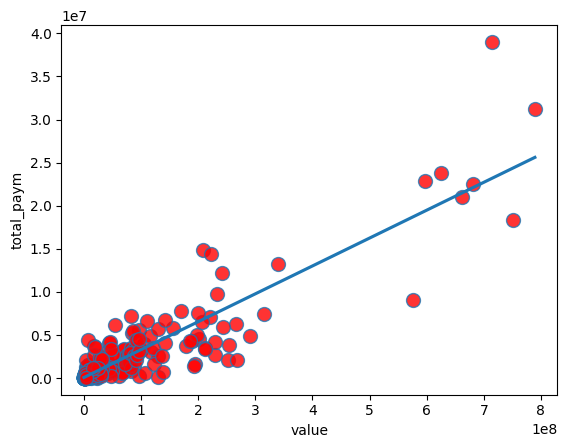

In [105]:
import seaborn as sns
sns.regplot(x='value', y='total_paym', data=df, ci=None, scatter_kws={'s':100, 'facecolor':'red'})

# Predicting test set result

In [106]:
y_pred = model.predict(X_test)

# Comparing the test values and the predicted values
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df

,Actual,Predicted
121,89250.00,1.644085e+05
352,429250.00,1.802565e+05
96,607750.00,6.960413e+05
43,184167.00,2.218900e+05
125,131750.00,1.457568e+05
...,...,...
60,178500.00,1.613405e+05
247,1334500.00,9.855817e+05
84,4247168.01,6.058579e+06
342,4364750.34,2.978872e+06


In [107]:
# Checking the residuals
residuals = y_test - y_pred
residuals

121   -7.515847e+04
352    2.489935e+05
96    -8.829128e+04
43    -3.772302e+04
125   -1.400681e+04
           ...     
60     1.715953e+04
247    3.489183e+05
84    -1.811411e+06
342    1.385879e+06
80     9.556962e+05
Name: total_paym, Length: 124, dtype: float64

Text(0, 0.5, 'Predictions')

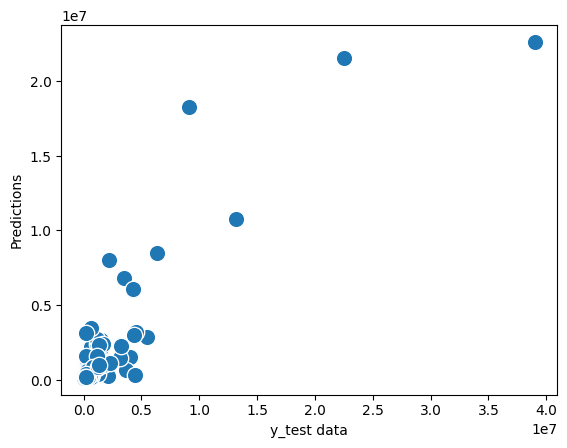

In [108]:
# Comparing the test data and the predicted values with a scatter plot
sns.scatterplot(x=y_test, y = y_pred, s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions')

# The values seem to align linearly, which shows that the model is acceptable.

# Quantify the strength of relationship with correaltion(R)

Low value of GDP tends to be pair with relatively low value of EHR payment, and vice versa

In [109]:
model.coef_
# The coefficient shows that, on average, the value increased by approximately  0.03216984 points for every total_paym the GOV subsidized

array([0.03147051])

# check the coefficients, R2, Adjusted R2, F statistics and P values
P value: The probability that randomly drawn points will result in the similarly strong relationship, so the smaller the p-value, the more confidence we have in the predictions we make with the line.

In [110]:
# Rebuild the model using OLS (Ordinary Least Squares)

# Add a constant to get an intercept
X_std_sm = sm.add_constant(X_train)
# create a fitted model
data_OLS_result = sm.OLS(y_train,X_std_sm).fit() 
data_OLS_result.params.sort_values(ascending=False) 
print(data_OLS_result.summary()) 

                            OLS Regression Results                            
Dep. Variable:             total_paym   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1429.
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          3.01e-113
Time:                        02:36:03   Log-Likelihood:                -4500.5
No. Observations:                 288   AIC:                             9005.
Df Residuals:                     286   BIC:                             9012.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.272e+05   9.72e+04      1.309      0.1

# Check the distribution of the error terms
In linear regression we assume that the error term follows normal distribution. So we have to check this assumption before we can use the model for making predictions. We check this by looking at the histogram of the error term visually, making sure that the error terms are normally distributed around zero and that the left and right side are broadly similar.

/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_57388/451520093.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_prediction), bins = 20)


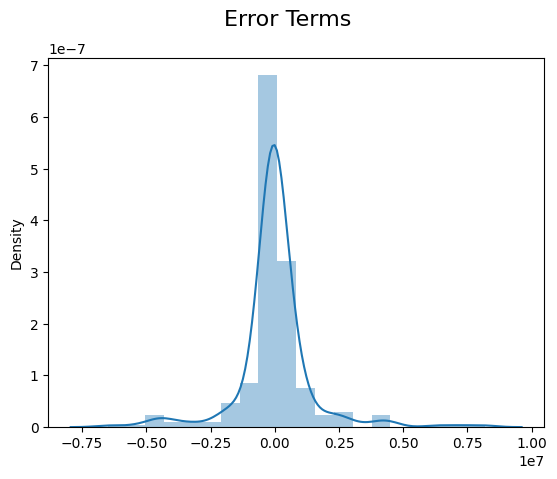

In [111]:
fig = plt.figure()
y_prediction = data_OLS_result.predict(X_std_sm)
sns.distplot((y_train - y_prediction), bins = 20)
fig.suptitle('Error Terms', fontsize = 16)
plt.show()

in the case of regression against a single variable, don't worry about the condition number UNLESS you care about the sensitivity of your y-intercept to the input data. 
Ref: https://stats.stackexchange.com/questions/243000/cause-of-a-high-condition-number-in-a-python-statsmodels-regression

In [112]:
# Calculate the VIF (Variance Importance Factor) 
# small VIF values indicates low correlation among variables under ideal conditions VIF<3.
from statsmodels.stats.outliers_influence import variance_inflation_factor
data_VIF = pd.DataFrame()
data_VIF['variable'] = X_std_sm.columns
number_of_variables = X_std_sm.shape[1]
data_VIF['VIF'] = [variance_inflation_factor(X_std_sm.values, i) for i in range(number_of_variables)]
data_VIF.sort_values(by="VIF", ascending=False) 

,variable,VIF
0,const,1.232439
1,value,1.000000


# Evaluating linear regression models

In [113]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
# Printing the metrics
print('R2 square:',r2_score(y_test, y_pred))
print('MAE: ', mae) # Mean Absolute Error
print('MSE: ', mse) # Mean Squared Error

R2 square: 0.7783121822731354
MAE:  814278.4235921368
MSE:  4068752154896.4033


## Root Mean Squared Error(RMSE)

In [114]:
from sklearn.metrics import mean_squared_error
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 2017114.8095476378


In [115]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE 14.517178736262194


In [116]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.7783121822731354


# Comparing machine learning models

# Application of Decision Tree regression

In [117]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train, y_train)
#Predicting using test set 
y_pred = dt_regressor.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('Suppport Vector Regression Accuracy: ', dt_regressor.score(X_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  0.6278202145879272
R2 square: 0.6278202145879272
MAE:  1082904.6541129034
MSE:  6830809737005.881


# Application of Random Forest Regression

In [118]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X_train,y_train)
#Predicting the SalePrices using test set 
y_pred = rf_regressor.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('Suppport Vector Regression Accuracy: ', rf_regressor.score(X_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  0.6615072222292644
R2 square: 0.6615072222292644
MAE:  1021944.8034459684
MSE:  6212534514045.389


# Application of Support Vector Regression

In [119]:
from sklearn.svm import SVR
regressor= SVR(kernel='rbf')
regressor.fit(X_train,y_train)
y_pred_svm=regressor.predict(X_test)
#y_pred_svm = cross_val_predict(regressor, x, y)
mae=metrics.mean_absolute_error(y_test, y_pred_svm)
mse=metrics.mean_squared_error(y_test, y_pred_svm)
# Printing the metrics
print('Suppport Vector Regression Accuracy: ', regressor.score(X_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred_svm))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  -0.0516203442712313
R2 square: -0.0516203442712313
MAE:  1389040.2478050007
MSE:  19300936721557.87


# Random Sample Consensus(RANSAC) Regression

Random sample consensus (RANSAC) is an iterative method to estimate parameters of a mathematical model from a set of observed data that contains outliers, when outliers are to be accorded no influence on the values of the estimates. Therefore, it also can be interpreted as an outlier detection method.

In [120]:
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
 

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
#train_pred = model.predict(X_train)

mae=metrics.mean_absolute_error(y_test, test_pred)
mse=metrics.mean_squared_error(y_test, test_pred)



print('Suppport Vector Regression Accuracy: ', model.score(X_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))



Suppport Vector Regression Accuracy:  0.7724720440689261
R2 square: 0.6615072222292644
MAE:  798070.3988996836
MSE:  4175939257674.1743
Mean MAE: 1068697.814 (382949.319)


/Users/vicky/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/linear_model/_ransac.py:320: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(


 # EHR spending correlation with per-capita income analysis

In [122]:
# load GDP dataset
df_income = pd.read_csv('County_Revenues_Per_Capita.csv')
df_income

,Entity Name,Fiscal Year,Total Revenues,Estimated Population,Revenues Per Capita
0,Alameda,2020,"3,752,904,942","1,670,834","2,246"
1,Alameda,2019,"3,609,996,506","1,669,301","2,163"
2,Alameda,2018,"3,057,808,028","1,660,202","1,842"
3,Alameda,2017,"2,949,248,612","1,645,359","1,792"
4,Alameda,2016,"2,638,195,535","1,627,865","1,621"
...,...,...,...,...,...
1021,Yuba,2007,"126,481,406","70,745","1,788"
1022,Yuba,2006,"120,119,483","69,827","1,720"
1023,Yuba,2005,"100,090,654","66,734","1,500"
1024,Yuba,2004,"96,186,352","64,840","1,483"


In [124]:
df_income["Fiscal Year"]

0       2020
1       2019
2       2018
3       2017
4       2016
        ... 
1021    2007
1022    2006
1023    2005
1024    2004
1025    2003
Name: Fiscal Year, Length: 1026, dtype: int64

In [129]:
df_income = df_income[(df_income["Fiscal Year"]>=2012) & (df_income["Fiscal Year"]<=2019)]
df_income["Fiscal Year"]

1       2019
2       2018
3       2017
4       2016
5       2015
        ... 
1012    2016
1013    2015
1014    2014
1015    2013
1016    2012
Name: Fiscal Year, Length: 456, dtype: int64

In [131]:
df_income['Fiscal Year'] = df_income['Fiscal Year'].apply(lambda x: str(x))

In [152]:
df_2 = df_income.merge(df_EHR, how='inner', left_on=['Entity Name', 'Fiscal Year'], right_on=['Business_1', 'Payment_Ye'])
df_2.head()

,Entity Name,Fiscal Year,Total Revenues,Estimated Population,Revenues Per Capita,Business_1,Payment_Ye,total_paym
0,Alameda,2019,"3,609,996,506","1,669,301","2,163",Alameda,2019,6739083.67
1,Alameda,2018,"3,057,808,028","1,660,202","1,842",Alameda,2018,2549750.00
2,Alameda,2017,"2,949,248,612","1,645,359","1,792",Alameda,2017,5737500.00
3,Alameda,2016,"2,638,195,535","1,627,865","1,621",Alameda,2016,3476500.00
4,Alameda,2015,"2,459,908,014","1,594,569","1,543",Alameda,2015,4862000.00


In [153]:
# convert string with comma as thousands separator to Number
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
df_2['Estimated Population']  = df_2['Estimated Population'].apply(lambda x: locale.atoi(x)) 
df_2['Revenues Per Capita']  = df_2['Revenues Per Capita'].apply(lambda x: locale.atoi(x)) 
df_2.head()

,Entity Name,Fiscal Year,Total Revenues,Estimated Population,Revenues Per Capita,Business_1,Payment_Ye,total_paym
0,Alameda,2019,"3,609,996,506",1669301,2163,Alameda,2019,6739083.67
1,Alameda,2018,"3,057,808,028",1660202,1842,Alameda,2018,2549750.00
2,Alameda,2017,"2,949,248,612",1645359,1792,Alameda,2017,5737500.00
3,Alameda,2016,"2,638,195,535",1627865,1621,Alameda,2016,3476500.00
4,Alameda,2015,"2,459,908,014",1594569,1543,Alameda,2015,4862000.00


In [162]:
# calculate the per capita payment from EHR 
df_2["Subsidy Per Capita"] = (df_2["total_paym"]//df_2["Estimated Population"])
df_2.head(10)

,Entity Name,Fiscal Year,Total Revenues,Estimated Population,Revenues Per Capita,Business_1,Payment_Ye,total_paym,Subsidy Per Capita
0,Alameda,2019,"3,609,996,506",1669301,2163,Alameda,2019,6739083.67,4.0
1,Alameda,2018,"3,057,808,028",1660202,1842,Alameda,2018,2549750.00,1.0
2,Alameda,2017,"2,949,248,612",1645359,1792,Alameda,2017,5737500.00,3.0
3,Alameda,2016,"2,638,195,535",1627865,1621,Alameda,2016,3476500.00,2.0
4,Alameda,2015,"2,459,908,014",1594569,1543,Alameda,2015,4862000.00,3.0
5,Alameda,2014,"2,448,572,609",1573254,1556,Alameda,2014,4009166.68,2.0
6,Alameda,2013,"2,366,341,383",1548681,1528,Alameda,2013,3315000.00,2.0
7,Alameda,2012,"2,317,607,829",1532137,1513,Alameda,2012,5581667.00,3.0
8,Amador,2017,"73,472,682",38382,1914,Amador,2017,106250.01,2.0
9,Amador,2015,"69,467,537",36312,1913,Amador,2015,21250.00,0.0


In [ ]:
# calculate the median income
df_2["Subsidy Per Capita"] = (df_2["total_paym"]//df_2["Estimated Population"])
df_2.head()

# Application of Linear Regression 

In [168]:
# ================================================
# Build the model
# ================================================

# Training data
X = df_2.loc[:,["Revenues Per Capita"]]  # features matrix
y = df_2.loc[:,'total_paym']  # target (response) matix

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

<AxesSubplot: xlabel='Revenues Per Capita', ylabel='total_paym'>

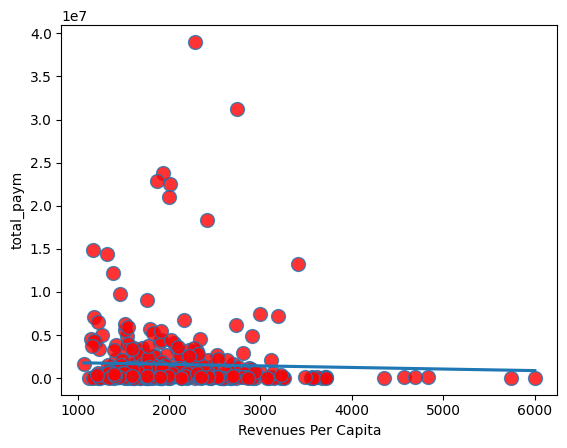

In [169]:
sns.regplot(x='Revenues Per Capita', y='total_paym', data=df_2, ci=None, scatter_kws={'s':100, 'facecolor':'red'})

# Predicting test set result

In [170]:
y_pred = model.predict(X_test)

# Comparing the test values and the predicted values
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df

,Actual,Predicted
121,18323146.69,1.264451e+06
355,590750.00,1.410279e+06
225,3096834.06,1.307031e+06
398,187000.00,1.157813e+06
129,1287750.00,1.539149e+06
...,...,...
84,416500.00,1.602831e+06
285,1083750.00,1.562512e+06
80,170000.00,1.297234e+06
284,1658916.67,1.513149e+06


In [171]:
# Checking the residuals
residuals = y_test - y_pred
residuals

121    1.705870e+07
355   -8.195286e+05
225    1.789803e+06
398   -9.708125e+05
129   -2.513994e+05
           ...     
84    -1.186331e+06
285   -4.787619e+05
80    -1.127234e+06
284    1.457675e+05
234   -1.577411e+06
Name: total_paym, Length: 122, dtype: float64

Text(0, 0.5, 'Predictions')

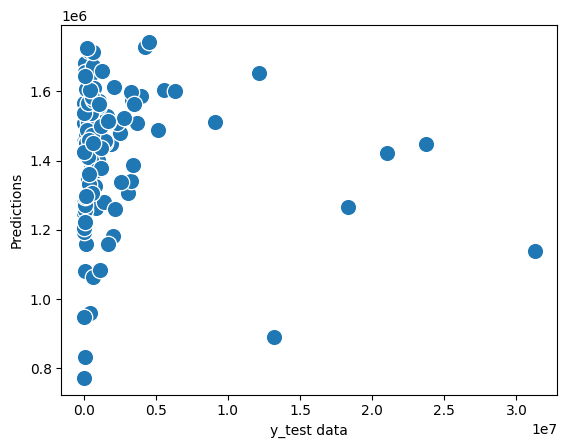

In [172]:
# Comparing the test data and the predicted values with a scatter plot
sns.scatterplot(x=y_test, y = y_pred, s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions')

# The values seem to align linearly, which shows that the model is acceptable.

# per-capita EHR spending correlation with median income analysis

In [163]:
# ================================================
# Build the model
# ================================================

# Training data
X = df_2.loc[:,["Revenues Per Capita"]]  # features matrix
y = df_2.loc[:,'Subsidy Per Capita']  # target (response) matix

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

<AxesSubplot: xlabel='Revenues Per Capita', ylabel='Subsidy Per Capita'>

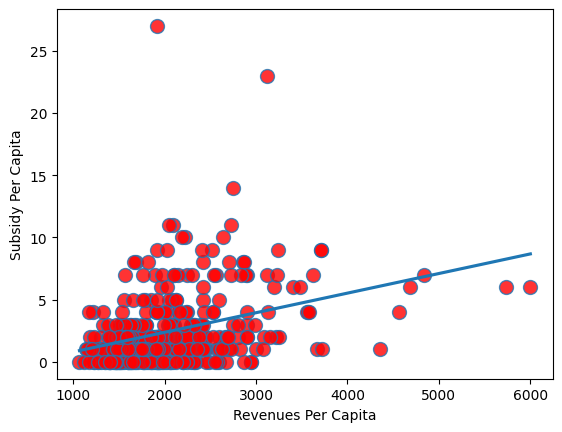

In [164]:
sns.regplot(x='Revenues Per Capita', y='Subsidy Per Capita', data=df_2, ci=None, scatter_kws={'s':100, 'facecolor':'red'})

In [165]:
y_pred = model.predict(X_test)

# Comparing the test values and the predicted values
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df

,Actual,Predicted
121,1.0,3.104099
355,9.0,2.419808
225,2.0,2.904293
398,2.0,3.604497
129,8.0,1.815086
...,...,...
84,2.0,1.516262
285,2.0,1.705458
80,0.0,2.950266
284,3.0,1.937092


In [166]:
# Checking the residuals
residuals = y_test - y_pred
residuals

121   -2.104099
355    6.580192
225   -0.904293
398   -1.604497
129    6.184914
         ...   
84     0.483738
285    0.294542
80    -2.950266
284    1.062908
234   -0.316456
Name: Subsidy Per Capita, Length: 122, dtype: float64

Text(0, 0.5, 'Predictions')

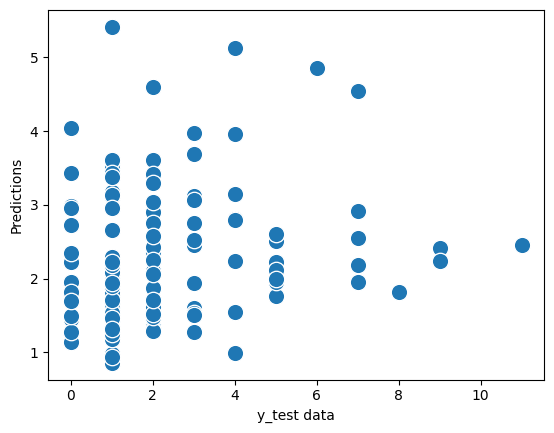

In [167]:
# Comparing the test data and the predicted values with a scatter plot
sns.scatterplot(x=y_test, y = y_pred, s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions')

# The values seem to align linearly, which shows that the model is acceptable.